# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = os.path.join("resources","city_data.csv")
ride_data_to_load = os.path.join("resources", "ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(pyber_data_df["type"]).count()["ride_id"]
city_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
city_driver_count = city_data_df.groupby(city_data_df["type"]).sum()["driver_count"]
city_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fare_city_type = pyber_data_df.groupby(pyber_data_df["type"]).sum()["fare"]
fare_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare = fare_city_type / city_ride_count 

print(avg_fare)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = fare_city_type / city_driver_count
print(avg_fare_driver)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame()
pyber_summary_df["total rides"] = city_ride_count
pyber_summary_df["Total Drivers"] = city_driver_count 
pyber_summary_df["total fares"] = fare_city_type 
pyber_summary_df["Avg Fare"] = avg_fare
pyber_summary_df["Avg Fare per Driver"] = avg_fare_driver
    
pyber_summary_df

,total rides,Total Drivers,total fares,Avg Fare,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
pyber_summary_df.dtypes

total rides              int64
Total Drivers            int64
total fares            float64
Avg Fare               float64
Avg Fare per Driver    float64
dtype: object

In [11]:
#  8. Format the columns.
#pyber_summary_df["total rides"] = pyber_summary_df["total rides"].map("{:,.2f}".format)
#pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.2f}".format)
pyber_summary_df["total fares"] = pyber_summary_df["total fares"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare"] = pyber_summary_df["Avg Fare"].map("${:.2f}".format)
pyber_summary_df["Avg Fare per Driver"] = pyber_summary_df["Avg Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,total rides,Total Drivers,total fares,Avg Fare,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [13]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_type_fare_df = pd.DataFrame(pyber_data_df.groupby(["type" , "date"]).sum()["fare"])
pyber_type_fare_df

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_type_fare_df = pyber_type_fare_df.reset_index()
pyber_type_fare_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [16]:
pyber_type_fare_df.dtypes

type     object
date     object
fare    float64
dtype: object

In [17]:
pyber_type_fare_df['date']= pd.to_datetime(pyber_type_fare_df['date'])
pyber_type_fare_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [18]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_type_fare_pivot = pyber_type_fare_df.pivot(index = "date", columns="type", values="fare")
pyber_type_fare_pivot



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [19]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_fare_jan_apr = pyber_type_fare_pivot.loc["2019-01-01":"2019-04-29"]
pyber_fare_jan_apr


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:00,NaN,NaN,28.41
2019-04-29 21:20:00,NaN,NaN,13.59
2019-04-29 22:08:00,NaN,25.75,NaN


In [20]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#did this as prior to moving into the pivot because I the format didn't look the same.  
pyber_fare_jan_apr.index = pd.to_datetime(pyber_fare_jan_apr.index)

In [21]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_fare_jan_apr.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               '2019-01-01 05:23:00', '2019-01-01 09:45:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               ...
               '2019-04-29 11:39:00', '2019-04-29 13:54:00',
               '2019-04-29 16:20:00', '2019-04-29 17:04:00',
               '2019-04-29 19:55:00', '2019-04-29 20:54:00',
               '2019-04-29 21:20:00', '2019-04-29 22:08:00',
               '2019-04-29 23:05:00', '2019-04-29 23:10:00'],
              dtype='datetime64[ns]', name='date', length=2204, freq=None)

In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_week_fare = pyber_fare_jan_apr.resample("W").sum()
pyber_week_fare

# Resample the DataFrame by the week. ie., "W", and get the trip counts for each week. 
#weekly_rides_df = tripcounts_Jan_Dec.resample('W').count()
#weekly_rides_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


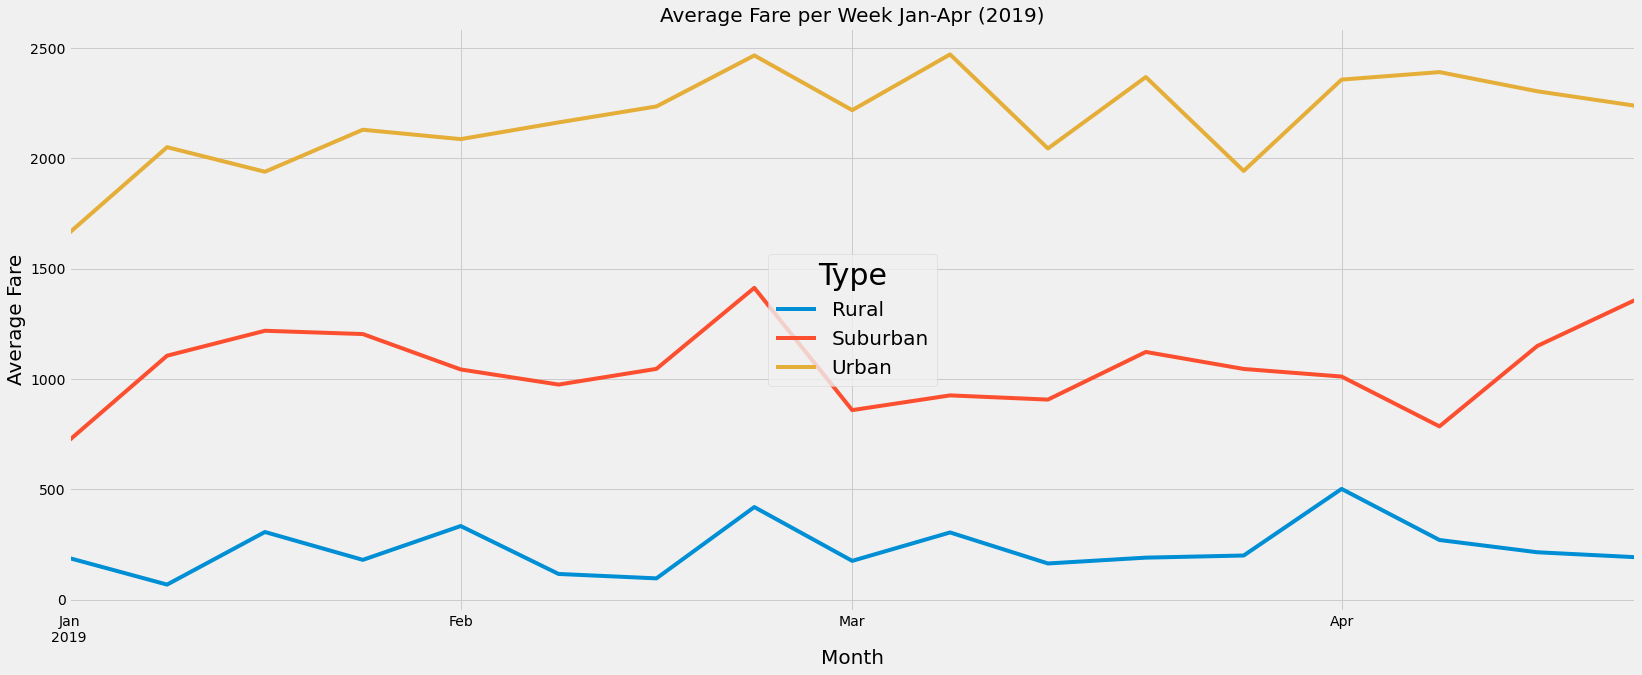

In [34]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Create the plot with ax.plt()
# Import the style from Matplotlib.
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(25,10))

pyber_week_fare.plot(kind="line", ax=ax)

mpl.rcParams['font.size'] = 30
ax.set_title("Average Fare per Week Jan-Apr (2019)", fontsize=20)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Average Fare', fontsize=20)
ax.set_xlim("2019-01-06", "2019-04-28")

#save the chart to analysis folder
plt.savefig("analysis/Pyber_fare_summary.png")
ax.legend(title = "Type", loc="best", fontsize=20)
